### Importing necessary libraries

In [40]:
!pip install geocoder
!pip install folium
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import geocoder # to get coordinates

import requests # library to handle requests
from bs4 import BeautifulSoup # library to parse HTML and XML documents

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

print("Libraries imported.")

Libraries imported.


### Scraping data from website

In [41]:
url = 'https://en.wikipedia.org/wiki/List_of_cities_in_Texas_by_population#List_of_cities_and_towns'
df = pd.read_html(url)[1]
df

,Rank,Place name,2019 Census Estimates,2010 Census,% Change
0,1,Houston,2325502,2099451,10.77%
1,2,San Antonio,1532233,1327407,13.90%
2,3,Dallas,1345047,1197816,12.29%
3,4,Austin,964254,790390,22.00%
4,5,Fort Worth,895008,741206,20.75%
5,6,El Paso,682669,649121,5.17%
6,7,Arlington,398123,365438,8.47%
7,8,Corpus Christi,326554,305215,6.68%
8,9,Plano,288061,259841,10.12%
9,10,Laredo,261639,236091,10.40%


In [42]:
#getting the top 10 cities by population
df = df.iloc[:40]
df

,Rank,Place name,2019 Census Estimates,2010 Census,% Change
0,1,Houston,2325502,2099451,10.77%
1,2,San Antonio,1532233,1327407,13.90%
2,3,Dallas,1345047,1197816,12.29%
3,4,Austin,964254,790390,22.00%
4,5,Fort Worth,895008,741206,20.75%
5,6,El Paso,682669,649121,5.17%
6,7,Arlington,398123,365438,8.47%
7,8,Corpus Christi,326554,305215,6.68%
8,9,Plano,288061,259841,10.12%
9,10,Laredo,261639,236091,10.40%


In [43]:
#Keeping only the city names
df.drop(['Rank','2019 Census Estimates','2010 Census','% Change'], axis = 1, inplace = True)
df.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,Place name
0,Houston
1,San Antonio
2,Dallas
3,Austin
4,Fort Worth


In [44]:
df.rename(columns = {'Place name':'Cities'}, inplace = True)
df.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,Cities
0,Houston
1,San Antonio
2,Dallas
3,Austin
4,Fort Worth


In [45]:
df.shape

(40, 1)

### Getting Coordinates of the cities

In [46]:
# define a function to get coordinates
def get_latlng(cities):
    # initialize your variable to None
    lat_lng_coords = None
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, Texas,USA'.format(cities))
        lat_lng_coords = g.latlng
    return lat_lng_coords

In [47]:
# call the function to get the coordinates, store in a new list using list comprehension
coords = [ get_latlng(cities) for cities in df["Cities"].tolist() ]

In [48]:
coords

[[29.760780000000068, -95.36951999999997],
 [29.42458000000005, -98.49460999999997],
 [32.77822000000003, -96.79511999999994],
 [30.26759000000004, -97.74298999999996],
 [32.750950000000046, -97.33085999999997],
 [31.759160000000065, -106.48748999999998],
 [32.735600000000034, -97.10771999999997],
 [27.796410000000037, -97.40373999999997],
 [33.020790000000034, -96.69924999999995],
 [27.530920000000037, -99.50222999999994],
 [33.58451000000008, -101.84500999999995],
 [32.914270000000045, -96.63654999999994],
 [32.81352000000004, -96.95533999999998],
 [35.207250000000045, -101.83388999999994],
 [32.747700000000066, -97.00719999999995],
 [33.198950000000025, -96.61499999999995],
 [33.15048000000007, -96.83465999999999],
 [25.902090000000044, -97.49923999999999],
 [29.69085000000007, -95.19547999999998],
 [31.11689000000007, -97.72736999999995],
 [26.20742000000007, -98.22935999999999],
 [32.78343000000007, -96.60211999999996],
 [32.00002000000006, -102.07445999999999],
 [33.2165900000000

In [49]:
# create temporary dataframe to populate the coordinates into Latitude and Longitude
df_coords = pd.DataFrame(coords, columns=['Latitude', 'Longitude'])
# merge the coordinates into the original dataframe
df['Latitude'] = df_coords['Latitude']
df['Longitude'] = df_coords['Longitude']
print(df.shape)
df.head()

(40, 3)


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Cities,Latitude,Longitude
0,Houston,29.76078,-95.36952
1,San Antonio,29.42458,-98.49461
2,Dallas,32.77822,-96.79512
3,Austin,30.26759,-97.74299
4,Fort Worth,32.75095,-97.33086


In [50]:
df.to_csv('Texas_cities.csv', index = False)

### Create a map of Texas with neighborhoods superimposed on top

In [51]:
# get the coordinates of Texas
address = 'Texas, USA'

geolocator = Nominatim(user_agent="my-application")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Texas, USA: {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Texas, USA: 31.8160381, -99.5120986.


In [52]:
# create map of Texas using latitude and longitude values
map_TX = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, cities in zip(df['Latitude'], df['Longitude'], df['Cities']):
    label = '{}'.format(cities)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_TX)  
    
map_TX

In [53]:
# save the map as HTML file
map_TX.save('map_TX.html')

###  Use the Foursquare API to explore the cities

In [54]:
# define Foursquare Credentials and Version
CLIENT_ID = 'LSXIL4LQDIIODHWX3EBX0KGHFHA2U4KPIXIHD0MAP3XT5OZQ' 
CLIENT_SECRET = ' ONE5R1LACWEOCJZ32KGUINUXZZVAUP1ZLG5FQBC0AQHKK5SK' #  Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('My credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

My credentails:
CLIENT_ID: LSXIL4LQDIIODHWX3EBX0KGHFHA2U4KPIXIHD0MAP3XT5OZQ
CLIENT_SECRET: ONE5R1LACWEOCJZ32KGUINUXZZVAUP1ZLG5FQBC0AQHKK5SK


 ### Getting the top 100 venues that are within a radius of 2500 meters.

In [55]:
radius = 2500
LIMIT = 100

venues = []

for lat, long, cities in zip(df['Latitude'], df['Longitude'], df['Cities']):
    
    # create the API request URL
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        long,
        radius, 
        LIMIT)
    
    # make the GET request
    results = requests.get(url).json()["response"]['groups'][0]['items']
    
    # return only relevant information for each nearby venue
    for venue in results:
        venues.append((
            cities,
            lat, 
            long, 
            venue['venue']['name'], 
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng'],  
            venue['venue']['categories'][0]['name']))

In [56]:
# convert the venues list into a new DataFrame
venues_df = pd.DataFrame(venues)

# define the column names
venues_df.columns = ['City', 'Latitude', 'Longitude', 'VenueName', 'VenueLatitude', 'VenueLongitude', 'VenueCategory']

print(venues_df.shape)
venues_df.head()

(3375, 7)


,City,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
0,Houston,29.76078,-95.36952,Hobby Center for the Performing Arts,29.761526,-95.369376,Performing Arts Venue
1,Houston,29.76078,-95.36952,Alley Theatre,29.761671,-95.365313,Theater
2,Houston,29.76078,-95.36952,Wortham Theater Center,29.763353,-95.365663,Theater
3,Houston,29.76078,-95.36952,Sam Houston Park,29.759876,-95.371211,Park
4,Houston,29.76078,-95.36952,Jones Hall,29.761240,-95.365301,Concert Hall


### checking how many venues were returned for each PostalCode

In [57]:
venues_df.groupby(["City"]).count()

,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
City,,,,,,
Abilene,36,36,36,36,36,36
Allen,100,100,100,100,100,100
Amarillo,90,90,90,90,90,90
Arlington,100,100,100,100,100,100
Austin,100,100,100,100,100,100
Beaumont,48,48,48,48,48,48
Brownsville,74,74,74,74,74,74
Carrollton,100,100,100,100,100,100
College Station,100,100,100,100,100,100


### Checking how many kinds of venues categories is returned

In [58]:
print('There are {} uniques categories.'.format(len(venues_df['VenueCategory'].unique())))

There are 309 uniques categories.


In [59]:
# check if the results contain "Shopping Mall"
("Shopping Mall") in venues_df['VenueCategory'].unique()

True

In [60]:
"Shopping Plaza" in venues_df['VenueCategory'].unique()

True

### Analyzing Each City

In [61]:
# one hot encoding
TX_onehot = pd.get_dummies(venues_df[['VenueCategory']], prefix="", prefix_sep="")

# add City column back to dataframe
TX_onehot['City'] = venues_df['City'] 

# move City column to the first column
#fixed_columns = list(TX_onehot.columns[-1:]) + list(TX_onehot.columns[:-1])
#TX_onehot = TX_onehot[fixed_columns]

print(TX_onehot.shape)
TX_onehot.head()

(3375, 310)


,Accessories Store,American Restaurant,Antique Shop,Aquarium,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Assisted Living,Athletics & Sports,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Big Box Store,Bike Shop,Bistro,Bookstore,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Business Service,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Capitol Building,Caribbean Restaurant,Chinese Restaurant,Chiropractor,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Bookstore,College Football Field,College Library,College Quad,College Rec Center,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Costume Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Disc Golf,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Drive-in Theater,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Entertainment Service,Event Service,Event Space,Fabric Shop,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General College & University,General Entertainment,German Restaurant,Gift Shop,Go Kart Track,Golf Course,Golf Driving Range,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,High School,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hospital,Hostel,Hot Dog Joint,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Laundromat,Lawyer,Library,Light Rail Station,Lingerie Store,Liquor Store,Locksmith,Lounge,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Motel,Motorcycle Shop,Motorsports Shop,Movie Theater,Multiplex,Museum,Music School,Music Store,Music Venue,Nail Salon,New American Restaurant,Nightclub,Non-Profit,Noodle House,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoors & Recreation,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Piano Bar,Pie Shop,Pizza Place,Playground,Plaza,Polish Restaurant,Pool,Portuguese Restaurant,Post Office,Pub,Public Art,Racetrack,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Rental Service,Resort,Rest Area,Restaurant,River,Rock Club,Russian Restaurant,Salad Place,Salon / Barbershop,Salvadoran Restaurant,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Repair,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soccer Stadium,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Steakhouse,Storage Facility,Supermarket,Supplement Shop,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tanning Salon,Tapas Restaurant,Tea Room,Tex-Mex Restaurant,Thai Restaurant,Theat

###  Grouping rows by cities and by taking the mean of the frequency of occurrence of each category

In [62]:
TX_grouped = TX_onehot.groupby(["City"]).mean().reset_index()

print(TX_grouped.shape)
TX_grouped

(40, 310)


,City,Accessories Store,American Restaurant,Antique Shop,Aquarium,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Assisted Living,Athletics & Sports,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Big Box Store,Bike Shop,Bistro,Bookstore,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Business Service,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Capitol Building,Caribbean Restaurant,Chinese Restaurant,Chiropractor,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Bookstore,College Football Field,College Library,College Quad,College Rec Center,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Costume Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Disc Golf,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Drive-in Theater,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Entertainment Service,Event Service,Event Space,Fabric Shop,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General College & University,General Entertainment,German Restaurant,Gift Shop,Go Kart Track,Golf Course,Golf Driving Range,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,High School,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hospital,Hostel,Hot Dog Joint,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Laundromat,Lawyer,Library,Light Rail Station,Lingerie Store,Liquor Store,Locksmith,Lounge,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Motel,Motorcycle Shop,Motorsports Shop,Movie Theater,Multiplex,Museum,Music School,Music Store,Music Venue,Nail Salon,New American Restaurant,Nightclub,Non-Profit,Noodle House,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoors & Recreation,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Piano Bar,Pie Shop,Pizza Place,Playground,Plaza,Polish Restaurant,Pool,Portuguese Restaurant,Post Office,Pub,Public Art,Racetrack,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Rental Service,Resort,Rest Area,Restaurant,River,Rock Club,Russian Restaurant,Salad Place,Salon / Barbershop,Salvadoran Restaurant,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Repair,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soccer Stadium,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Steakhouse,Storage Facility,Supermarket,Supplement Shop,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tanning Salon,Tapas Restaurant,Tea Room,Tex-Mex Restaurant,Thai Restaurant,

In [63]:
len(TX_grouped[TX_grouped["Shopping Mall"] > 0])

3

In [64]:
len(TX_grouped[TX_grouped["Shopping Plaza"] > 0])

2

### Create a new DataFrame for Shopping Mall and Shopping Plaza data only

In [65]:
TX_mall = TX_grouped[["City","Shopping Mall", "Shopping Plaza"]]
TX_mall.head()

,City,Shopping Mall,Shopping Plaza
0,Abilene,0.0,0.00
1,Allen,0.0,0.01
2,Amarillo,0.0,0.00
3,Arlington,0.0,0.00
4,Austin,0.0,0.00


### Clustering cities

#### Finding centeroids with k-means

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return_n_iter=True)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return_n_iter=True)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return_n_iter=True)


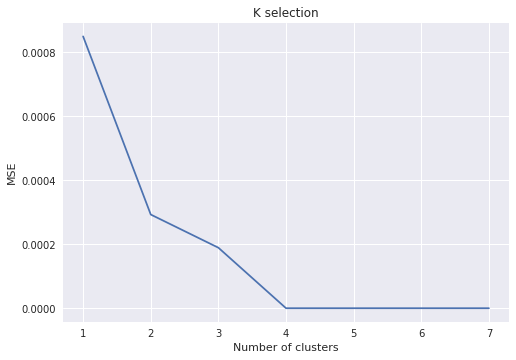

In [66]:
# Finding best k
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("seaborn")
Ks = 8
mse = np.zeros((Ks-1))
TX_mall_clustering = TX_mall.drop(['City'], 1)
for n in range(1,Ks):
    
    # set number of clusters
    kclusters = n
    # run k-means clustering
    kmeans = KMeans(n_clusters=kclusters, random_state=0, init = 'random', n_init = 15).fit(TX_mall_clustering)
    mse[n-1] = kmeans.inertia_

plt.plot(range(1,Ks),mse)
plt.xlabel("Number of clusters")
plt.ylabel("MSE")
plt.title("K selection")
plt.show()

According to elbow method 4 clusters are good enough

In [67]:
kclusters = 4

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(TX_mall_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 2, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [68]:
# create a new dataframe that includes the cluster as well as the top 10 venues for each city.
TX_merged = TX_mall.copy()

# add clustering labels
TX_merged["Cluster Labels"] = kmeans.labels_

In [69]:
TX_merged = TX_merged.join(df.set_index("Cities"), on="City")

print(TX_merged.shape)
TX_merged.head()

(40, 6)


,City,Shopping Mall,Shopping Plaza,Cluster Labels,Latitude,Longitude
0,Abilene,0.0,0.00,0,32.44917,-99.74142
1,Allen,0.0,0.01,2,33.10162,-96.67449
2,Amarillo,0.0,0.00,0,35.20725,-101.83389
3,Arlington,0.0,0.00,0,32.73560,-97.10772
4,Austin,0.0,0.00,0,30.26759,-97.74299


In [70]:
TX_merged.sort_values(["Cluster Labels"], inplace=True)
TX_merged

,City,Shopping Mall,Shopping Plaza,Cluster Labels,Latitude,Longitude
0,Abilene,0.000000,0.00,0,32.44917,-99.74142
21,League City,0.000000,0.00,0,29.50370,-95.09278
22,Lewisville,0.000000,0.00,0,33.04722,-96.99573
23,Lubbock,0.000000,0.00,0,33.58451,-101.84501
24,McAllen,0.000000,0.00,0,26.20742,-98.22936
25,McKinney,0.000000,0.00,0,33.19895,-96.61500
26,Mesquite,0.000000,0.00,0,32.78343,-96.60212
27,Midland,0.000000,0.00,0,32.00002,-102.07446
28,Odessa,0.000000,0.00,0,31.84915,-102.37519
29,Pasadena,0.000000,0.00,0,29.69085,-95.19548


#### Display clusters in map

In [71]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(TX_merged['Latitude'], TX_merged['Longitude'], TX_merged['City'], TX_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
          
map_clusters

In [72]:
# save the map as HTML file
map_clusters.save('map_clusters.html')

### Analyzing the clusters

#### Cluster 1

In [73]:
cl1 = TX_merged.loc[TX_merged['Cluster Labels'] == 0]
cl1 = cl1.drop(['Cluster Labels','Latitude','Longitude'], axis = 1)
cl1

,City,Shopping Mall,Shopping Plaza
0,Abilene,0.0,0.0
21,League City,0.0,0.0
22,Lewisville,0.0,0.0
23,Lubbock,0.0,0.0
24,McAllen,0.0,0.0
25,McKinney,0.0,0.0
26,Mesquite,0.0,0.0
27,Midland,0.0,0.0
28,Odessa,0.0,0.0
29,Pasadena,0.0,0.0


#### Cluster 2

In [74]:
cl2 = TX_merged.loc[TX_merged['Cluster Labels'] == 1]
cl2 = cl2.drop(['Cluster Labels','Latitude','Longitude'], axis = 1)
cl2

,City,Shopping Mall,Shopping Plaza
34,San Antonio,0.01,0.0
20,Laredo,0.01,0.0


#### Cluster 3

In [75]:
cl3 = TX_merged.loc[TX_merged['Cluster Labels'] == 2]
cl3 = cl3.drop(['Cluster Labels','Latitude','Longitude'], axis = 1)
cl3

,City,Shopping Mall,Shopping Plaza
13,Fort Worth,0.0,0.01
1,Allen,0.0,0.01


#### Cluster 4

In [76]:
cl4 = TX_merged.loc[TX_merged['Cluster Labels'] == 3]
cl4 = cl4.drop(['Cluster Labels','Latitude','Longitude'], axis = 1)
cl4

,City,Shopping Mall,Shopping Plaza
36,The Woodlands (CDP)[5],0.022472,0.0


### Observation

Most of the shopping malls and plazas are concentrated in the South Texas area, with the highest number in cluster 2 and moderate number in cluster 3,4  and 5. On the other hand, cluster 1 has very low number of shopping malls and plazas in the custering cities. This cluster consists of many of the most populated cities, thus they have a great demand for malls and plazas. This represents a great opportunity and high potential areas to open new shopping malls and plazas as there is very less number of malls and plazas compared to the demands. Therefore, property developers are advised to avoid South Texas which already have high concentration of shopping malls and suffering from intense competition and cluster 1 will be the best option to invest